# Preparing Images for Classification Using blobFromImage
Here we will examined OpenCV’s `blobFromImage` and `blobFromImages` deep learning functions.
These methods are used to prepare input images for classification via pre-trained deep learning models.

For OpenCV image classification, you first need to preprocess your image data.
Nearly all state-of-the-art deep learning models perform preprocessing tasks involve:

* **Mean Subtraction** - Mean subtraction is used to help combat illumination changes in the input images in the dataset. We compute the average pixel intensity across all images in the training set for each of the Red, Green, and Blue channels. You then subtract these values from all pixels in your training set.
* **Scaling** - (optional) Also to combat illumination changes, the pixels color standard deviation across the training set is calculated to use to scale the pixel value 
* **Channel Swapping** - (optional) OpenCV assumes images are in BGR channel order; however, the mean value calculation assumes we are using RGB order. To resolve this, you can swap the Red and Blue channels in image.

To help in image classification, OpenCV’s new deep neural network module, `dnn`,
contains two functions, `blobFromImage` and `blobFromImages`, that can be used for preprocessing images
and preparing them for classification via pre-trained deep learning models.
Both `blobFromImage` and `blobFromImages` perform mean subtraction, scaling, and channel swapping.
We can also swap the Red and Blue channels of the image depending on channel ordering.

OpenCV documentation states that `blobFromImage` creates a 4-dimensional blob from image.
It optionally resizes and crops image from center,
subtract mean values, scales values by scalefactor, swap Blue and Red channels.

>**NOTE:** A "blob" is OpenCV speak for one or more image(s) with the same spatial dimensions
(i.e., width and height), same depth (number of channels), that have all be preprocessed in the same manner.

In [1]:
%matplotlib inline

# import the necessary packages
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from imutils import paths
import numpy as np
import cv2


PathDataSet = "/home/jeff/src/Jupyter-Notebooks/DataSets/BlobImages Dataset/"
 
# load the class labels from disk
rows = open(PathDataSet + "synset_words.txt").read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]
 
# load our serialized model from disk
net = cv2.dnn.readNetFromCaffe(PathDataSet + "bvlc_googlenet.prototxt", PathDataSet + "bvlc_googlenet.caffemodel")
 
# grab the paths to the input images
imagePaths = sorted(list(paths.list_images(PathDataSet + "images/")))
imagePaths = [s.replace('\\', '') for s in imagePaths]

# print the list of paths to the images
print("imagePaths = ", imagePaths)

imagePaths =  ['/home/jeff/src/Jupyter-Notebooks/DataSets/BlobImages Dataset/images/beer.png', '/home/jeff/src/Jupyter-Notebooks/DataSets/BlobImages Dataset/images/brown_bear.png', '/home/jeff/src/Jupyter-Notebooks/DataSets/BlobImages Dataset/images/keyboard.png', '/home/jeff/src/Jupyter-Notebooks/DataSets/BlobImages Dataset/images/monitor.png', '/home/jeff/src/Jupyter-Notebooks/DataSets/BlobImages Dataset/images/space_shuttle.png']


An image is a 3-dimensional NumPy array with a color space from BGR (Blue, Green, Red).
first image has shape: (600, 450, 3)


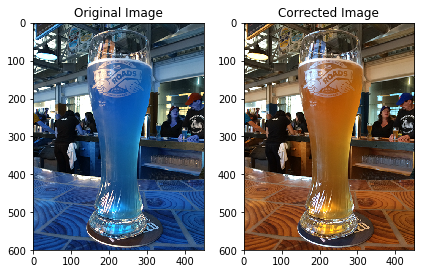

In [2]:
# load the first image from disk
image = cv2.imread(imagePaths[0])
print("An image is a 3-dimensional NumPy array with a color space from BGR (Blue, Green, Red).")
print("first image has shape: {}".format(image.shape))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Corrected Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()

In [3]:
# pre-process image by resizing it to 224x224 pixels
resized = cv2.resize(image, (224, 224))

# construct a blob that can be passed through the pre-trained network
blob = cv2.dnn.blobFromImage(resized, 1, (224, 224), (104, 117, 123))
print("A blob is a 4-dimensional NumPy array with a color space from RGB (Red, Green, Blue).")
print("first blob has shape: {}".format(blob.shape))

x = blob[0, :, :, :]             # slice out the first dimension of the array
print("x has shape: {}".format(x.shape))
y = np.transpose(x, (1, 2, 0))   # transpose the dimensions of the array
print("y has shape: {}".format(y.shape))
print("y = ", y)

A blob is a 4-dimensional NumPy array with a color space from RGB (Red, Green, Blue).
first blob has shape: (1, 3, 224, 224)
x has shape: (3, 224, 224)
y has shape: (224, 224, 3)
y =  [[[ -19.  -34.  -61.]
  [ -63.  -82. -103.]
  [ -55.  -78.  -94.]
  ...
  [ -13.  -35.  -58.]
  [ -12.  -35.  -58.]
  [ -10.  -35.  -58.]]

 [[ -58.  -77.  -97.]
  [ -46.  -67.  -86.]
  [  22.    0.  -19.]
  ...
  [ -14.  -36.  -58.]
  [ -16.  -37.  -58.]
  [ -13.  -35.  -57.]]

 [[ -48.  -67.  -87.]
  [ -28.  -48.  -70.]
  [ -26.  -44.  -68.]
  ...
  [ -13.  -34.  -57.]
  [  -8.  -29.  -52.]
  [  -7.  -28.  -52.]]

 ...

 [[  36.  -56. -107.]
  [  44.  -50. -105.]
  [  50.  -45. -101.]
  ...
  [  14.  -48.  -85.]
  [   8.  -54.  -94.]
  [  25.  -40.  -81.]]

 [[  46.  -47. -103.]
  [  47.  -46. -104.]
  [  51.  -42. -100.]
  ...
  [  17.  -62. -108.]
  [  24.  -55. -101.]
  [  20.  -61. -106.]]

 [[  42.  -51. -105.]
  [  41.  -51. -105.]
  [  39.  -53. -107.]
  ...
  [  18.  -63. -109.]
  [  26.  -56. -

In [4]:
# now plot the image
plt.title("Blob Image")
plt.imshow(y)
plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.

# Sources
* [Deep learning: How OpenCV’s blobFromImage works](https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/)